In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import phik

In [2]:
# Road raw training data
raw_data = pd.read_csv('train.csv', index_col=0)
raw_data.head(5)

# Create copy not to work on raw data
data = raw_data.copy()
data.shape

(1460, 80)

In [3]:
# Exclude columns with > 20% missing values
threshold = 0.2
data = data[data.columns[data.isnull().mean() < threshold]]
data.shape

(1460, 75)

Types of data:
- categorical (e.g. color, type of material)
- ordinal (e.g. rating, university grade)  
- numerical
    - discrete (e.g. number of bathrooms, age)
    - continuous (e.g. temperature, weight)

In [4]:
interval_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                   'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                   '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                   'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
                   'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
                   'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                   'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
fake_interval_columns = ['MSSubClass', 'OverallQual', 'OveralCond', 'MoSold']

interval_columns_filtered = list(set(interval_columns) - set(fake_interval_columns))

In [5]:
# Calculate "correlation" between features and target
corr = data[interval_columns_filtered].corr()
#phik_matrix(interval_cols=interval_columns_filtered)

<AxesSubplot:>

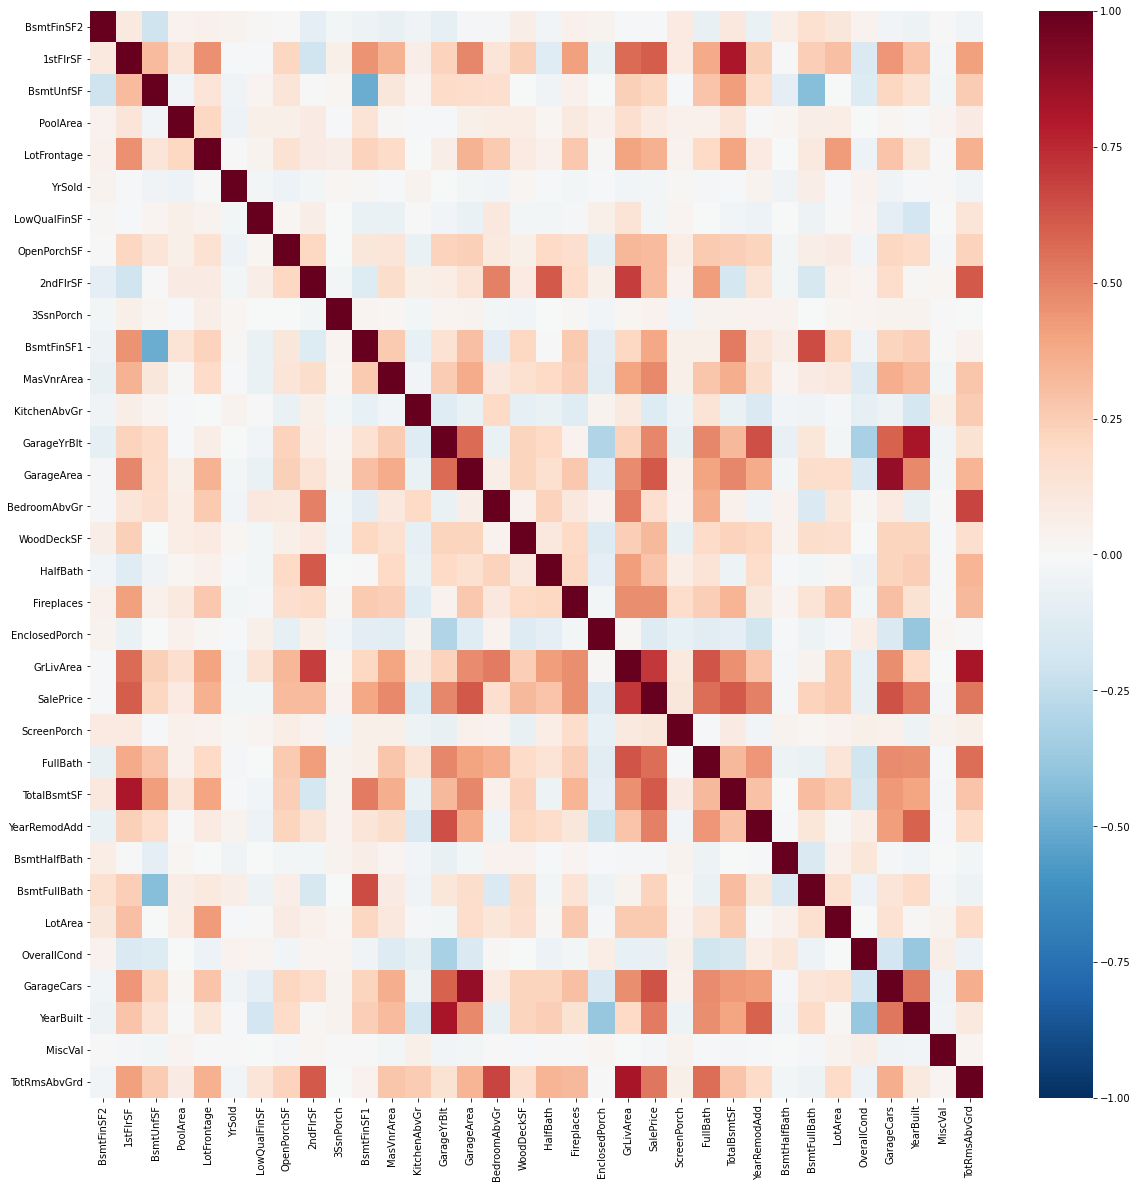

In [6]:
fig, ax = plt.subplots(figsize=(20, 20), facecolor='w')
sns.heatmap(corr, ax=ax, vmin=-1, vmax=1, cmap='RdBu_r')

In [7]:
thresehold = 0.3
corr=corr['SalePrice'].sort_values(ascending=False)

In [33]:
corr=corr[corr>thresehold]
corr

SalePrice       1.000000
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

In [32]:
filter_columns=corr.index
data[filter_columns]

,SalePrice,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
Id,,,,,,,,,,,,,,,,,,
1,208500,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854,61
2,181500,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0,0
3,223500,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,68.0,0,866,42
4,140000,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,60.0,0,756,35
5,250000,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,84.0,192,1053,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,175000,1647,2,460,953,953,2,7,1999,2000,1999.0,0.0,1,0,62.0,0,694,40
1457,210000,2073,2,500,1542,2073,2,7,1978,1988,1978.0,119.0,2,790,85.0,349,0,0
1458,266500,2340,1,252,1152,1188,2,9,1941,2006,1941.0,0.0,2,275,66.0,0,1152,60
